# UB Philantropy- Decision tree Classifier


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


### Loading Data
Let's first load the required libraries and Philantropy Dataset using pandas' read CSV function 

In [2]:
ub_philantropy = pd.read_csv(r"F:\UB Philantrophy\Management_zipcode_1_use.csv")

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (34,35,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Overview of the Datsaet

In [3]:
ub_philantropy.head(5)

,ID_NUMBER,FACULTY_STAFF_IND,MARITAL_STATUS,GENDER,AGE_BRACKET,STATE_CODE,ZIPCODE,STUDENT_ACTIVITY_PARTICIPANT,DEGREE_CODE1,DEGREE_YEAR1,...,NO_EVENTS_2017_NEW,NO_EVENTS_2016_NEW,NO_EVENTS_2015_NEW,NO_EVENTS_2014_NEW,NO_EVENTS_2013_NEW,NO_EVENTS_2012_NEW,NO_EVENTS_2011_NEW,NO_EVENTS_2010_NEW,NO_EVENTS_2009_NEW,NO_EVENTS_2008_NEW
0,109248,N,S,M,90,NY,14068,N,BS,1953,...,0,0,0,0,0,0,0,0,0,1
1,52671,N,S,M,60,NY,13027,N,BS,1981,...,0,0,0,0,0,0,0,0,0,0
2,159329,N,M,M,45,NY,14043,N,BS,1992,...,0,0,0,0,0,0,0,0,0,0
3,52861,N,,M,55,NY,14052,N,BS,1983,...,0,0,0,0,0,0,0,0,0,0
4,37191,N,M,M,80,NaN,NaN,N,BS,1975,...,0,0,0,0,0,0,0,0,0,0


Lets take a look at the variables available

In [4]:
ub_philantropy.columns

Index(['ID_NUMBER', 'FACULTY_STAFF_IND', 'MARITAL_STATUS', 'GENDER',
       'AGE_BRACKET', 'STATE_CODE', 'ZIPCODE', 'STUDENT_ACTIVITY_PARTICIPANT',
       'DEGREE_CODE1', 'DEGREE_YEAR1', 'SCHOOL1', 'DEGREE_CODE2',
       'DEGREE_YEAR2', 'SCHOOL2', 'DEGREE_CODE3', 'DEGREE_YEAR3', 'SCHOOL3',
       'DEGREE_CODE4', 'DEGREE_YEAR4', 'SCHOOL4', 'DONOR_CATEGORY',
       'LIFETIME_RECOGNITION_AMT', 'NO_YRS_GIVING', 'GIFT_AMOUNT_2018_NEW',
       'GIFT_AMOUNT_2017_NEW', 'GIFT_AMOUNT_2016_NEW', 'GIFT_AMOUNT_2015_NEW',
       'GIFT_AMOUNT_2014_NEW', 'GIFT_AMOUNT_2013_NEW', 'GIFT_AMOUNT_2012_NEW',
       'GIFT_AMOUNT_2011_NEW', 'GIFT_AMOUNT_2010_NEW', 'GIFT_AMOUNT_2009_NEW',
       'GIFT_AMOUNT_2008_NEW', 'LAST_GIFT_DATE', 'FIRST_GIFT_DATE',
       'FIRST_GIFT_AMOUNT', 'GIVING_SCHOOL_UNIT1', 'GIVING_SCHOOL_UNIT2',
       'GIVING_SCHOOL_UNIT3', 'ENGAGEMENT_SCORE', 'NO_EVENTS_2018_NEW',
       'NO_EVENTS_2017_NEW', 'NO_EVENTS_2016_NEW', 'NO_EVENTS_2015_NEW',
       'NO_EVENTS_2014_NEW', 'NO_EVENTS_2

### Feature Selection
Here we  need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables)

In [5]:
feature_cols = ['GIFT_AMOUNT_2008_NEW', 'GIFT_AMOUNT_2009_NEW', 'GIFT_AMOUNT_2010_NEW', 'GIFT_AMOUNT_2011_NEW','GIFT_AMOUNT_2012_NEW','GIFT_AMOUNT_2013_NEW','GIFT_AMOUNT_2014_NEW','GIFT_AMOUNT_2015_NEW','GIFT_AMOUNT_2016_NEW','GIFT_AMOUNT_2017_NEW','GIFT_AMOUNT_2018_NEW']
X = ub_philantropy[feature_cols] # Features
y = ub_philantropy.DONOR_CATEGORY # Target variable

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy<br>
Let's split the dataset by using function train_test_split().We need to pass parameters features, target, and test_set size

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn

In [7]:
clf = DecisionTreeClassifier()

In [8]:
clf = clf.fit(X_train,y_train)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
y_pred

array(['Non Donor   ', 'Non Donor   ', 'Non Donor   ', ...,
       'Reacquired  ', 'Non Donor   ', 'Non Donor   '], dtype=object)

### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the categories of donors<br>
Accuracy can be computed by comparing actual test set values and predicted values

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9968938070277616


Well, we got a classification rate of 99.6%, considered as good accuracy <br>

### Visualizing Decision Trees
We can use Scikit-learn's export_graphviz function to display the tree 

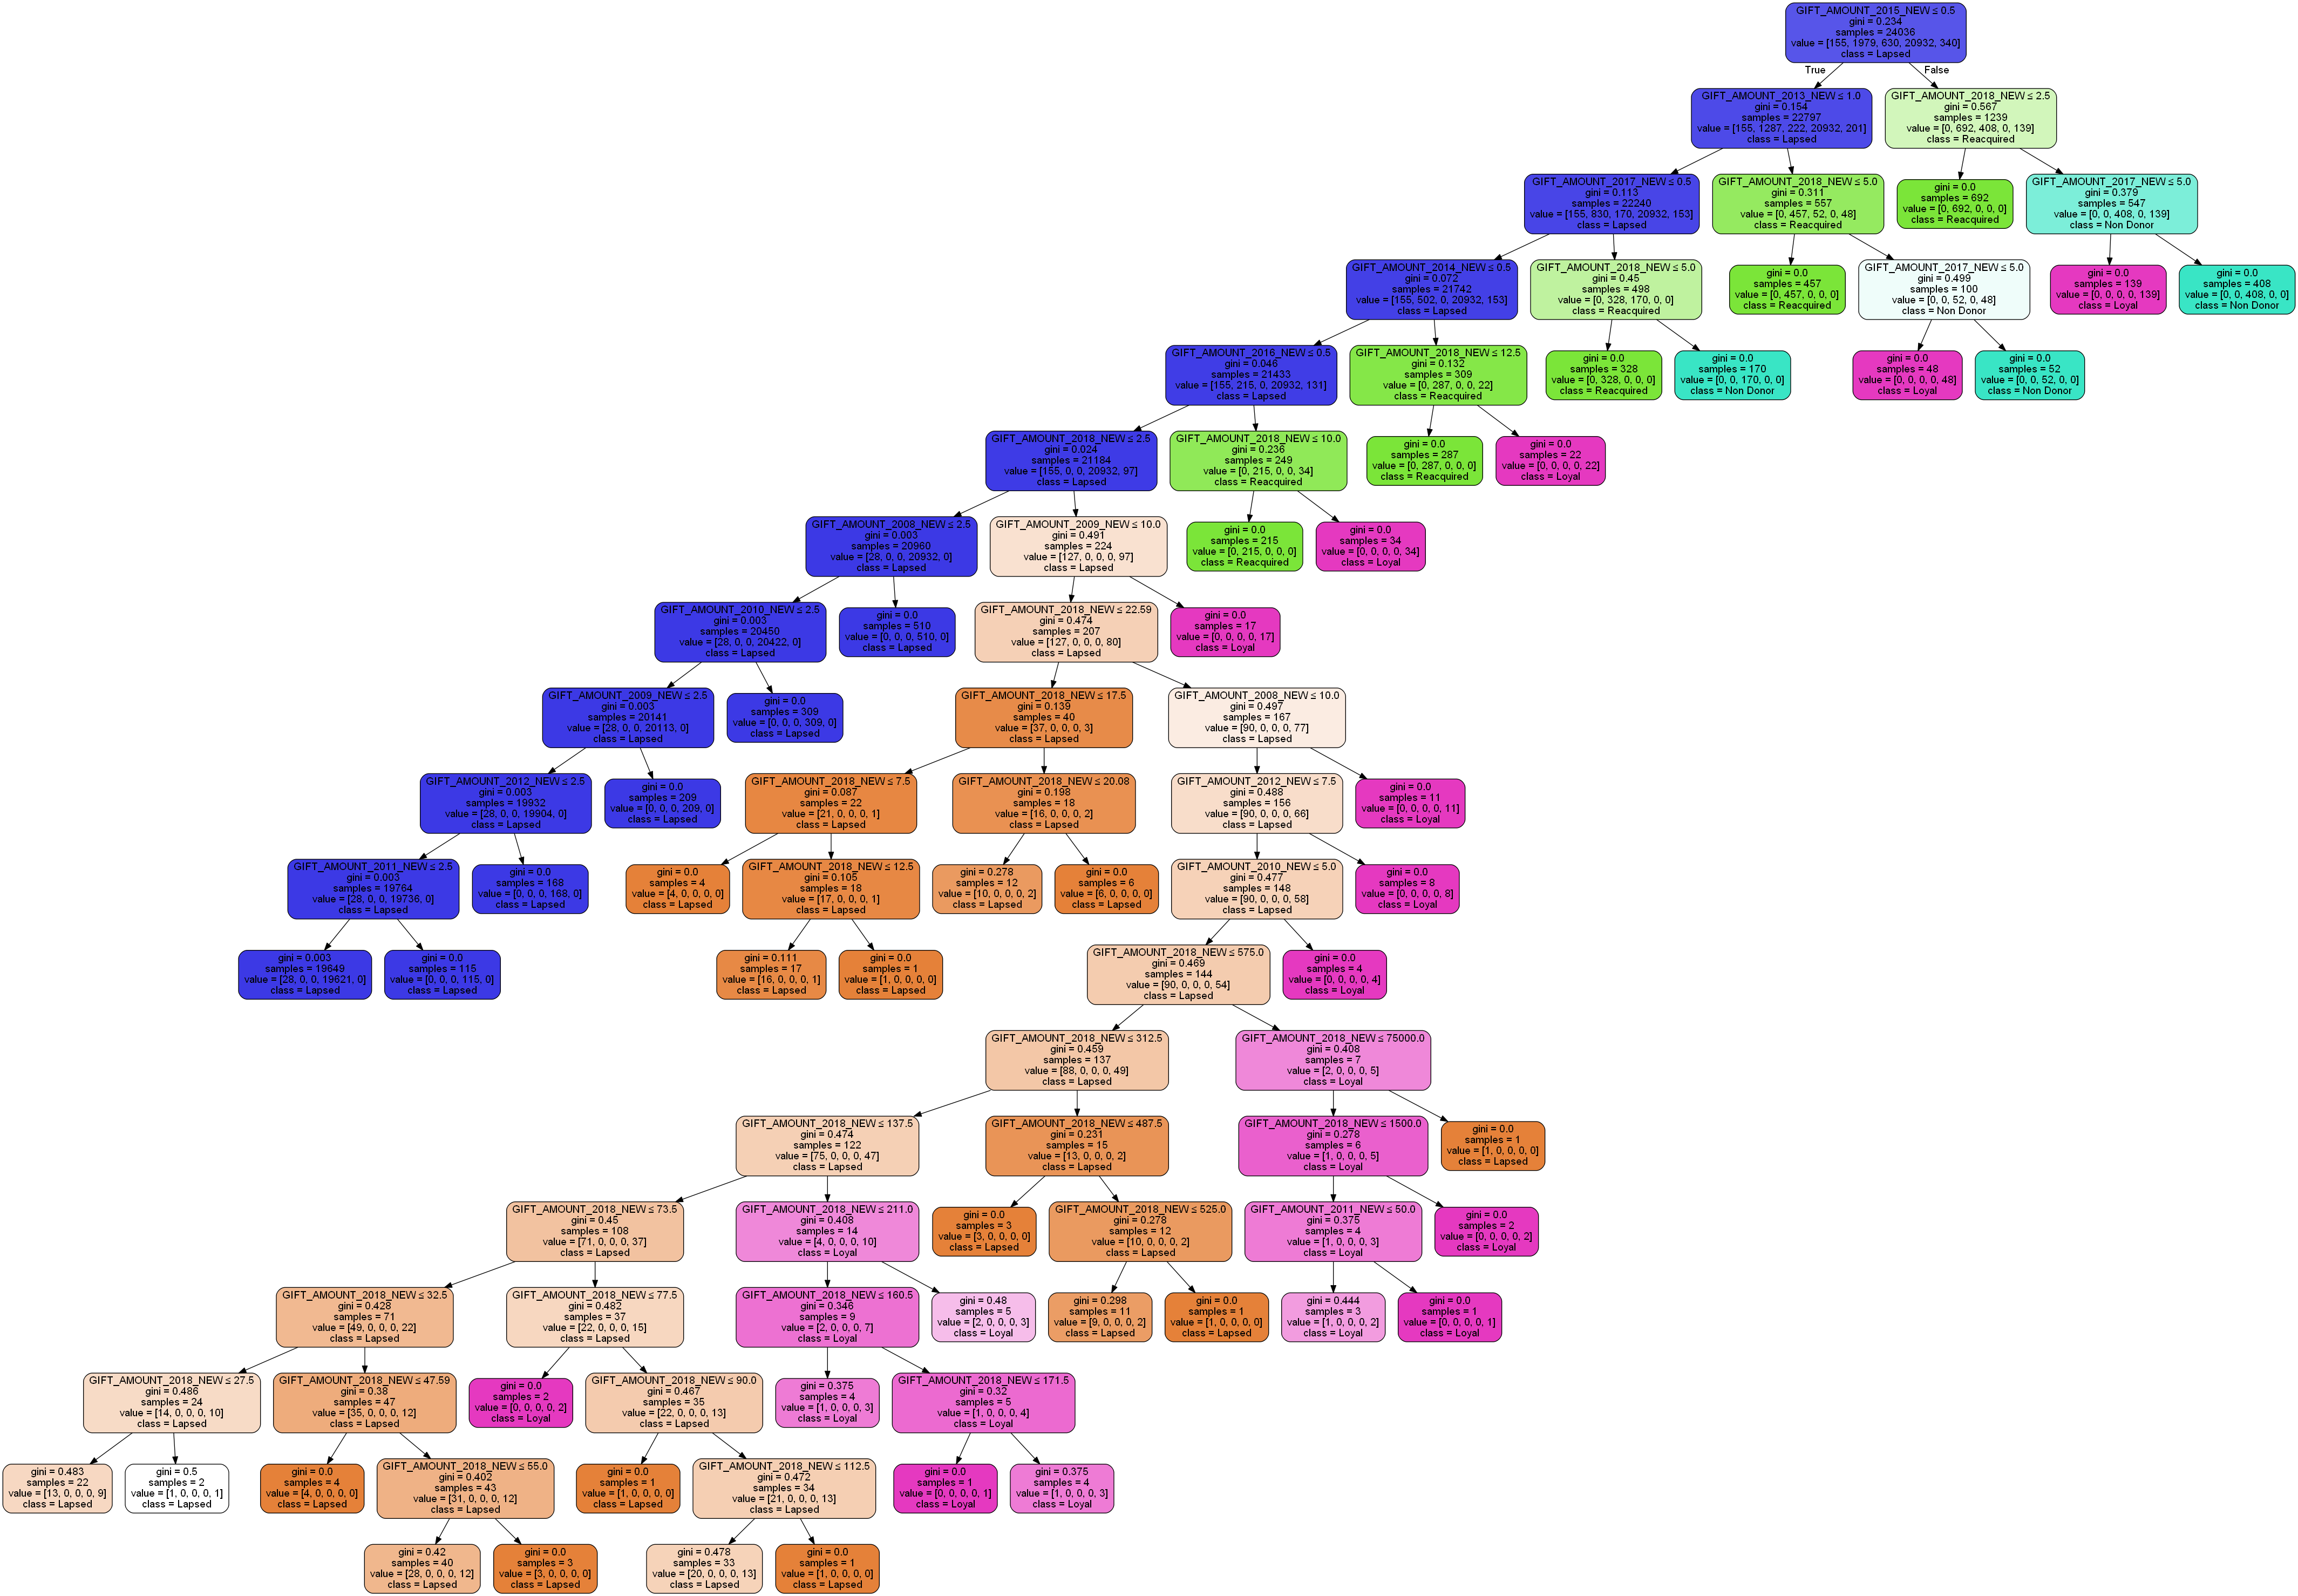

In [12]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Lapsed','Reacquired','Non Donor','Lapsed','Loyal','1st Time'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('philantropy.png')
Image(graph.create_png())



In the decision tree chart, each internal node has a decision rule that splits the data<br>
Gini referred as Gini ratio, which measures the impurity of the node<br>
We can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node<br>

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.971753057658707


We reduce the maximum depth which is the numberof branches a tree can handle<br>
We find that the accuracy is reduced .So we stick to a maximum depth of 6 for high accuracy

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9965055329062318


### Conclusion:
    We have categorized the alumni to:<br>
    1. Donors
    2. Non Donors
    3. Loyal Donors
    4. Acquired Donors
    5. Lapsed Donors
    
We have acheived a model accuracy of 99.6 % which is good
    
    